In [27]:
using Pkg
Pkg.activate("./")
using Images
using ImageContrastAdjustment, TestImages, ImageCore
using ImageTransformations, CoordinateTransformations, Rotations
using MLDatasets
using LinearAlgebra

In [165]:
mnist_x = reshape(MNIST.traintensor(Float64),28*28,:);
mnist_y = MNIST.trainlabels(1:size(mnist_x, 2));
fmnist_x = reshape(FashionMNIST.traintensor(Float64),28*28,:);
fmnist_y = FashionMNIST.trainlabels(1:size(fmnist_x, 2));

N = 100
mnist_x  = mnist_x'[1:N,:]
mnist_y  = mnist_y[1:N]
fmnist_x = fmnist_x'[1:N,:]
fmnist_y = fmnist_y[1:N];

img_url = vcat(
    ["./images/mnist_"*string(i)*".png" for i in 1:N],
    ["./images/fmnist_"*string(i)*".png" for i in 1:N]);

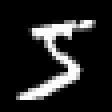

In [77]:
img = load(img_url[1])

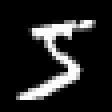

In [191]:
img = MNIST.convert2image(mnist_x[1,:])

In [279]:
function applygamma(datasetarray)
    img  = Gray.(datasetarray)
    mimg = adjust_histogram(img, GammaCorrection(gamma = 2))
    return reshape(convert(Array{Float64}, mimg),28*28)
end

function applyequalization(datasetarray)
    img  = Gray.(datasetarray)
    mimg = adjust_histogram(img, Equalization(nbins = 256))
    return reshape(convert(Array{Float64}, mimg),28*28)
end

function applyrotation(datasetarray, rotation=pi/2)
    img  = Gray.(datasetarray)
    trfm = recenter(RotMatrix(pi/2), center(img));
    mimg = warp(img,trfm)
    return reshape(convert(Array{Float64}, mimg),28*28)
end

img = MNIST.convert2image(mnist_x[1,:])
modif= applygamma(mnist_x[1,:]);
modif= applyequalization(mnist_x[1,:]);
# modif= applyrotation(mnist_x[1,:]);
trfm = recenter(RotMatrix(pi/4), center(img));
img = warp(img,trfm)
# img = MNIST.convert2image(modif)
# reshape(convert(Array{Float64}, img),28*28)
size(img)

(40, 40)

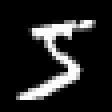

In [78]:
rotation_angles = [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 6*pi/4, 7*pi/4, 2*pi]
trfm = recenter(RotMatrix(rotation_angles[1]), center(img));
imgw = warp(img, trfm)

applygammacorrection! (generic function with 1 method)

In [207]:
# applygammacorrection!(mnist_x[1:2,:])
# MNIST.convert2image(mnist_x[1,:])
# MNIST.convert2features()

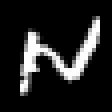

In [163]:
# Gray.(reshape(mnist_x[1,:]),28,28)
convert2i

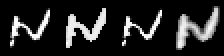

In [224]:
hist_equal = adjust_histogram(img, Equalization(nbins = 256))
gamma_correction = adjust_histogram(img, GammaCorrection(gamma = 2))
hist_adapt = adjust_histogram(img, AdaptiveEqualization(nbins = 256, rblocks = 4, cblocks = 4, clip = 0.2))

mosaicview(img, hist_equal, gamma_correction, hist_adapt; nrow = 1)

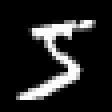

In [80]:
img_orig = load(img_url[1])

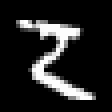

In [81]:
reverse(img,dims=2)

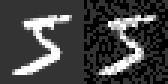

In [82]:
noise = ones(size(img_orig)) .* 0.2 .* (maximum(img_orig) - minimum(img_orig))
img_const = img_orig + noise

mask = rand(Float64, size(img_orig)) .< 0.5
noise[mask] = noise[mask] .* -1
img_noise = img_orig + noise

mosaicview(img_const, img_noise; nrow=1)

In [150]:
mnist_x[1:2,:]

2×784 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [146]:
img = load(img_url[1])
function invertimage!(img)
    for i in 1:size(img)[1]
        for j in 1:size(img)[2]
            if img[i,j] == 0
                img[i,j] = 1
            else
                img[i,j] = 1 - img[i,j]
            end
        end
    end
end
# img[img.>0] = img[img.>0] .- 1

invertimage! (generic function with 1 method)

In [147]:
invertimage!(img)

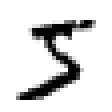

In [148]:
img

In [125]:
img[1,1] == 0
img[1,1] = 1

1

In [145]:
imgf = convert(Array{Float64}, img)

28×28 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

In [76]:
imgf = convert(Array{Float64}, img)

28×28 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  